In [59]:
import pandas as pd

In [60]:
df_entrenamiento = pd.read_csv('C:/Users/tomas/OneDrive - Universidad de Chile/Semestre 2023-2 Archivos/Laboratorio de Programación Científica/Laboratorios/Github/casoCDD/Cruce/data_para_entrenar.csv')
df_entrenamiento = pd.read_csv('C:/Users/tomas/OneDrive - Universidad de Chile/Semestre 2023-2 Archivos/Laboratorio de Programación Científica/Laboratorios/Github/casoCDD/Oversampling/df_entrenamiento_sobre.csv')
df_validacion = pd.read_csv('C:/Users/tomas/OneDrive - Universidad de Chile/Semestre 2023-2 Archivos/Laboratorio de Programación Científica/Laboratorios/Github/casoCDD/data_para_validar.csv')

In [61]:
df_entrenamiento

,Unnamed: 0.1,Unnamed: 0,grade,seq_4_avg,quiz_avg,seq_0_avg,seq_1_avg,seq_2_avg,seq_3_avg,duracion_sesion_avg,...,pause_video_mean,pause_video_std,speed_change_video_mean,speed_change_video_std,num_eventos_seq_0,num_eventos_seq_1,num_eventos_seq_2,num_eventos_seq_3,num_eventos_seq_4,label
0,0,0,1.000000,1.0,0.965517,1.000000,1.000000,1.000000,1.00000,4.944454,...,8.700000,7.409453,0.300000,0.674949,76.000000,384.000000,128.000000,16.000000,20.000000,1
1,1,1032,0.990000,1.0,0.956897,1.000000,0.977273,1.000000,1.00000,2.410485,...,4.428571,5.957727,0.142857,0.363137,70.000000,168.000000,90.000000,16.000000,6.000000,1
2,2,1734,1.000000,1.0,0.965517,1.000000,1.000000,1.000000,1.00000,3.794893,...,7.571429,10.399863,0.142857,0.478091,197.000000,346.000000,151.000000,47.000000,8.000000,1
3,3,2898,0.880000,1.0,0.850690,0.625000,0.909091,0.907778,1.00000,4.008391,...,13.600000,22.487457,0.600000,1.298351,177.000000,466.000000,201.000000,33.000000,9.000000,1
4,4,4203,1.000000,1.0,0.965517,1.000000,1.000000,1.000000,1.00000,9.352263,...,15.333333,25.263319,0.777778,1.060275,264.000000,810.000000,80.000000,19.000000,11.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
603,603,282522,0.940363,1.0,0.868407,1.000000,0.804222,0.779122,1.00000,5.003087,...,6.908206,10.864660,0.122678,0.272942,67.602155,244.612931,156.119639,8.036288,3.012096,0
604,604,129478,0.842813,1.0,0.813376,0.866209,0.762787,0.704212,0.69011,5.248995,...,9.150560,9.437040,0.200196,0.477776,134.394506,451.265933,186.107700,13.000000,2.929670,0
605,605,310479,0.839504,1.0,0.809557,0.947313,0.703419,0.532586,1.00000,6.482947,...,5.525875,7.274908,0.106805,0.295753,94.586866,419.706268,135.533134,22.314030,11.318209,0
606,606,168867,0.881915,1.0,0.852923,0.717063,0.817364,0.902334,1.00000,5.551731,...,15.414130,18.579293,1.461072,2.026446,127.521237,556.190787,222.634988,29.964003,10.982002,0


In [62]:
df_entrenamiento.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'grade', 'seq_4_avg', 'quiz_avg',
       'seq_0_avg', 'seq_1_avg', 'seq_2_avg', 'seq_3_avg',
       'duracion_sesion_avg', 'duracion_sesion_std', 'duracion_EOL',
       'num_sesiones_agosto', 'num_sesiones_septiembre',
       'num_sesiones_noviembre', 'page_close_mean', 'page_close_std',
       'problem_graded_mean', 'problem_graded_std', 'problem_check_mean',
       'problem_check_std', 'problem_show_mean', 'problem_show_std',
       'seg_prev_mean', 'seg_prev_std', 'seg_next_mean', 'seg_next_std',
       'seg_goto_mean', 'seg_goto_std', 'load_video_mean', 'load_video_std',
       'play_video_mean', 'play_video_std', 'pause_video_mean',
       'pause_video_std', 'speed_change_video_mean', 'speed_change_video_std',
       'num_eventos_seq_0', 'num_eventos_seq_1', 'num_eventos_seq_2',
       'num_eventos_seq_3', 'num_eventos_seq_4', 'label'],
      dtype='object')

In [63]:
df_entrenamiento.drop(['Unnamed: 0', 'Unnamed: 0.1','seg_goto_mean','seg_next_std', 'seg_prev_std', 'seg_next_mean', 'seg_goto_std', 'seg_prev_mean' ], axis = 1, inplace=True)


In [64]:
df_entrenamiento

,grade,seq_4_avg,quiz_avg,seq_0_avg,seq_1_avg,seq_2_avg,seq_3_avg,duracion_sesion_avg,duracion_sesion_std,duracion_EOL,...,pause_video_mean,pause_video_std,speed_change_video_mean,speed_change_video_std,num_eventos_seq_0,num_eventos_seq_1,num_eventos_seq_2,num_eventos_seq_3,num_eventos_seq_4,label
0,1.000000,1.0,0.965517,1.000000,1.000000,1.000000,1.00000,4.944454,5.131721,64.000000,...,8.700000,7.409453,0.300000,0.674949,76.000000,384.000000,128.000000,16.000000,20.000000,1
1,0.990000,1.0,0.956897,1.000000,0.977273,1.000000,1.00000,2.410485,2.627586,60.000000,...,4.428571,5.957727,0.142857,0.363137,70.000000,168.000000,90.000000,16.000000,6.000000,1
2,1.000000,1.0,0.965517,1.000000,1.000000,1.000000,1.00000,3.794893,5.967056,59.000000,...,7.571429,10.399863,0.142857,0.478091,197.000000,346.000000,151.000000,47.000000,8.000000,1
3,0.880000,1.0,0.850690,0.625000,0.909091,0.907778,1.00000,4.008391,5.076566,58.000000,...,13.600000,22.487457,0.600000,1.298351,177.000000,466.000000,201.000000,33.000000,9.000000,1
4,1.000000,1.0,0.965517,1.000000,1.000000,1.000000,1.00000,9.352263,8.270573,58.000000,...,15.333333,25.263319,0.777778,1.060275,264.000000,810.000000,80.000000,19.000000,11.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
603,0.940363,1.0,0.868407,1.000000,0.804222,0.779122,1.00000,5.003087,7.729962,52.000000,...,6.908206,10.864660,0.122678,0.272942,67.602155,244.612931,156.119639,8.036288,3.012096,0
604,0.842813,1.0,0.813376,0.866209,0.762787,0.704212,0.69011,5.248995,6.035853,56.394506,...,9.150560,9.437040,0.200196,0.477776,134.394506,451.265933,186.107700,13.000000,2.929670,0
605,0.839504,1.0,0.809557,0.947313,0.703419,0.532586,1.00000,6.482947,6.920673,53.842985,...,5.525875,7.274908,0.106805,0.295753,94.586866,419.706268,135.533134,22.314030,11.318209,0
606,0.881915,1.0,0.852923,0.717063,0.817364,0.902334,1.00000,5.551731,6.395383,55.263499,...,15.414130,18.579293,1.461072,2.026446,127.521237,556.190787,222.634988,29.964003,10.982002,0


In [65]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import numpy as np
import random
seed = 314159
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)


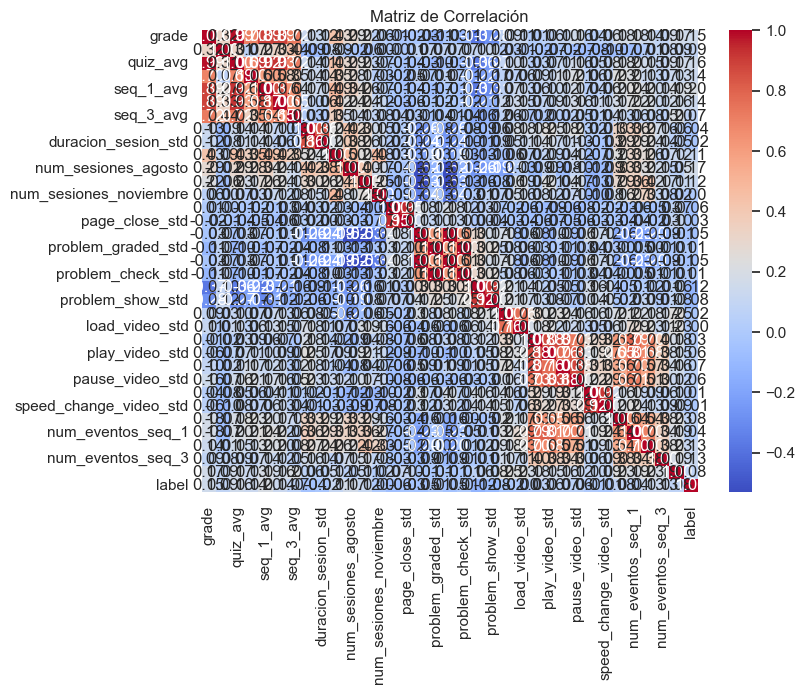

In [66]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Calcular la matriz de correlación
correlation_matrix = df_entrenamiento.corr()

# Visualizar la matriz de correlación utilizando seaborn y matplotlib
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

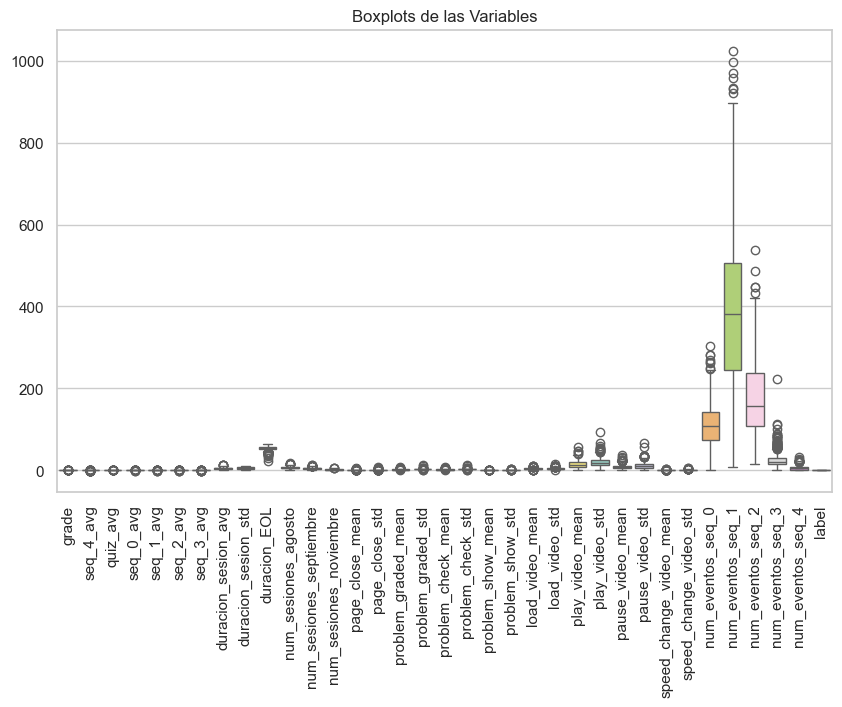

In [67]:
# Configurar el estilo de seaborn
sns.set(style="whitegrid")

# Crear boxplots para cada variable
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_entrenamiento, palette="Set3")
plt.xticks(rotation=90)  
plt.title('Boxplots de las Variables')
plt.show()

In [68]:
X = df_entrenamiento.drop(columns=['label'])  # Características
y = df_entrenamiento['label']  # Etiquetas

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=314159, stratify=y)


In [69]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Crea un objeto StandardScaler
scaler = StandardScaler()

# Ajusta el scaler a tus datos de entrenamiento y luego transforma los datos
X_train = scaler.fit_transform(X_train)

# Transforma también los datos de prueba usando el mismo scaler
X_test = scaler.transform(X_test)


In [70]:
import optuna
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

def objective(trial):
    # Definir espacio de búsqueda de hiperparámetros
    learning_rate = trial.suggest_float("learning_rate", 1e-5, 1e-1)
    num_hidden_layers = trial.suggest_int("num_hidden_layers", 1, 5)
    num_hidden_units = trial.suggest_int("num_hidden_units", 16, 256)
    dropout_rate = trial.suggest_float("dropout_rate", 0.0, 0.5)
    optimizer = trial.suggest_categorical("optimizer", ["adam", "sgd", "rmsprop"])
    activation = trial.suggest_categorical("activation", ["relu", "tanh", "sigmoid", "elu"])
    batch_size = trial.suggest_categorical("batch_size", [8, 16, 32, 64])

    # Construir el modelo de red neuronal con los hiperparámetros
    model = keras.Sequential()
    for _ in range(num_hidden_layers):
        model.add(keras.layers.Dense(num_hidden_units, activation=activation))
        model.add(keras.layers.BatchNormalization())
        model.add(keras.layers.Dropout(dropout_rate))
        
    model.add(keras.layers.Dense(1, activation="sigmoid"))

    # Compilar y entrenar el modelo
    if optimizer == "adam":
        optimizer_obj = keras.optimizers.Adam(learning_rate=learning_rate)
    elif optimizer == "sgd":
        optimizer_obj = keras.optimizers.SGD(learning_rate=learning_rate)
    elif optimizer == "rmsprop":
        optimizer_obj = keras.optimizers.RMSprop(learning_rate=learning_rate)
    else:
        raise ValueError("Optimizador no soportado")

    model.compile(optimizer=optimizer_obj,
                  loss="binary_crossentropy",
                  metrics=["accuracy"])
    
    early_stopping = keras.callbacks.EarlyStopping(
        patience=30,
        min_delta=0.001,
        restore_best_weights=True,
    )
    
    model.fit(X_train, y_train, epochs=500, batch_size=batch_size, verbose=0, validation_data=(X_test, y_test), callbacks=[early_stopping])

    # Evaluar el modelo
    y_pred = (model.predict(X_test) > 0.5).astype(int)
    accuracy = accuracy_score(y_test, y_pred)

    # Almacenar los pesos del modelo como un atributo del ensayo de Optuna
    trial.set_user_attr("model_weights", model.get_weights())
    
    # Guardar el modelo en los atributos de usuario del mejor intento
    trial.set_user_attr('model', model)

    return accuracy

# Crear un estudio Optuna

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

# Obtener el mejor conjunto de hiperparámetros
best_params = study.best_params
print("Mejor conjunto de hiperparámetros:", best_params)

# Después de la optimización, antes de guardar el objeto Study
best_model = study.best_trial.user_attrs.get('model')


[I 2023-11-25 16:13:59,666] A new study created in memory with name: no-name-a7b3f4a1-50a3-431f-80c9-74e69d90f482


4/4 [==============================] - 0s 2ms/step


[I 2023-11-25 16:14:10,648] Trial 0 finished with value: 0.6557377049180327 and parameters: {'learning_rate': 0.06009000614899891, 'num_hidden_layers': 3, 'num_hidden_units': 86, 'dropout_rate': 0.25471378819813184, 'optimizer': 'rmsprop', 'activation': 'tanh', 'batch_size': 16}. Best is trial 0 with value: 0.6557377049180327.


4/4 [==============================] - 0s 2ms/step


[I 2023-11-25 16:14:13,694] Trial 1 finished with value: 0.680327868852459 and parameters: {'learning_rate': 0.09819024714917603, 'num_hidden_layers': 1, 'num_hidden_units': 49, 'dropout_rate': 0.39196344236409925, 'optimizer': 'rmsprop', 'activation': 'tanh', 'batch_size': 32}. Best is trial 1 with value: 0.680327868852459.


4/4 [==============================] - 0s 3ms/step


[I 2023-11-25 16:14:19,833] Trial 2 finished with value: 0.7786885245901639 and parameters: {'learning_rate': 0.038245009775797006, 'num_hidden_layers': 2, 'num_hidden_units': 98, 'dropout_rate': 0.19682838474616476, 'optimizer': 'rmsprop', 'activation': 'tanh', 'batch_size': 16}. Best is trial 2 with value: 0.7786885245901639.


4/4 [==============================] - 0s 2ms/step


[I 2023-11-25 16:14:24,003] Trial 3 finished with value: 0.7868852459016393 and parameters: {'learning_rate': 0.09835303762875608, 'num_hidden_layers': 1, 'num_hidden_units': 86, 'dropout_rate': 0.01601314589391739, 'optimizer': 'sgd', 'activation': 'relu', 'batch_size': 64}. Best is trial 3 with value: 0.7868852459016393.


4/4 [==============================] - 0s 2ms/step


[I 2023-11-25 16:14:31,996] Trial 4 finished with value: 0.5901639344262295 and parameters: {'learning_rate': 0.06708301549733828, 'num_hidden_layers': 2, 'num_hidden_units': 116, 'dropout_rate': 0.3539174800116399, 'optimizer': 'rmsprop', 'activation': 'tanh', 'batch_size': 8}. Best is trial 3 with value: 0.7868852459016393.


4/4 [==============================] - 0s 3ms/step


[I 2023-11-25 16:14:51,179] Trial 5 finished with value: 0.8770491803278688 and parameters: {'learning_rate': 0.09429555421439803, 'num_hidden_layers': 5, 'num_hidden_units': 107, 'dropout_rate': 0.24319682116842622, 'optimizer': 'sgd', 'activation': 'sigmoid', 'batch_size': 16}. Best is trial 5 with value: 0.8770491803278688.


4/4 [==============================] - 0s 2ms/step


[I 2023-11-25 16:15:09,089] Trial 6 finished with value: 0.7786885245901639 and parameters: {'learning_rate': 0.006735233941130309, 'num_hidden_layers': 2, 'num_hidden_units': 32, 'dropout_rate': 0.46091414093507754, 'optimizer': 'rmsprop', 'activation': 'elu', 'batch_size': 8}. Best is trial 5 with value: 0.8770491803278688.


4/4 [==============================] - 0s 2ms/step


[I 2023-11-25 16:15:14,158] Trial 7 finished with value: 0.7704918032786885 and parameters: {'learning_rate': 0.006914518775961957, 'num_hidden_layers': 5, 'num_hidden_units': 93, 'dropout_rate': 0.13743253980921105, 'optimizer': 'adam', 'activation': 'elu', 'batch_size': 64}. Best is trial 5 with value: 0.8770491803278688.


4/4 [==============================] - 0s 2ms/step


[I 2023-11-25 16:15:20,011] Trial 8 finished with value: 0.7295081967213115 and parameters: {'learning_rate': 0.07991557355974435, 'num_hidden_layers': 4, 'num_hidden_units': 44, 'dropout_rate': 0.24174904228475602, 'optimizer': 'rmsprop', 'activation': 'sigmoid', 'batch_size': 64}. Best is trial 5 with value: 0.8770491803278688.


4/4 [==============================] - 0s 2ms/step


[I 2023-11-25 16:15:27,000] Trial 9 finished with value: 0.819672131147541 and parameters: {'learning_rate': 0.018249397334323035, 'num_hidden_layers': 1, 'num_hidden_units': 63, 'dropout_rate': 0.11250686929227333, 'optimizer': 'rmsprop', 'activation': 'tanh', 'batch_size': 8}. Best is trial 5 with value: 0.8770491803278688.


4/4 [==============================] - 0s 2ms/step


[I 2023-11-25 16:15:51,653] Trial 10 finished with value: 0.7786885245901639 and parameters: {'learning_rate': 0.04389646751498684, 'num_hidden_layers': 5, 'num_hidden_units': 187, 'dropout_rate': 0.3157112079302584, 'optimizer': 'sgd', 'activation': 'sigmoid', 'batch_size': 16}. Best is trial 5 with value: 0.8770491803278688.


4/4 [==============================] - 0s 2ms/step


[I 2023-11-25 16:16:16,629] Trial 11 finished with value: 0.8278688524590164 and parameters: {'learning_rate': 0.0248638150471393, 'num_hidden_layers': 4, 'num_hidden_units': 178, 'dropout_rate': 0.11562901211319732, 'optimizer': 'sgd', 'activation': 'sigmoid', 'batch_size': 8}. Best is trial 5 with value: 0.8770491803278688.


4/4 [==============================] - 0s 2ms/step


[I 2023-11-25 16:16:30,400] Trial 12 finished with value: 0.7704918032786885 and parameters: {'learning_rate': 0.02975367091308756, 'num_hidden_layers': 4, 'num_hidden_units': 169, 'dropout_rate': 0.10340796620805981, 'optimizer': 'sgd', 'activation': 'sigmoid', 'batch_size': 32}. Best is trial 5 with value: 0.8770491803278688.


4/4 [==============================] - 0s 2ms/step


[I 2023-11-25 16:16:50,308] Trial 13 finished with value: 0.8114754098360656 and parameters: {'learning_rate': 0.030225932814432286, 'num_hidden_layers': 4, 'num_hidden_units': 236, 'dropout_rate': 0.004376504352491234, 'optimizer': 'sgd', 'activation': 'sigmoid', 'batch_size': 8}. Best is trial 5 with value: 0.8770491803278688.


4/4 [==============================] - 0s 3ms/step


[I 2023-11-25 16:17:00,044] Trial 14 finished with value: 0.6721311475409836 and parameters: {'learning_rate': 0.05514768542305201, 'num_hidden_layers': 5, 'num_hidden_units': 154, 'dropout_rate': 0.1920884656857716, 'optimizer': 'sgd', 'activation': 'sigmoid', 'batch_size': 16}. Best is trial 5 with value: 0.8770491803278688.


4/4 [==============================] - 0s 3ms/step


[I 2023-11-25 16:17:13,770] Trial 15 finished with value: 0.6475409836065574 and parameters: {'learning_rate': 0.07231075678584716, 'num_hidden_layers': 4, 'num_hidden_units': 191, 'dropout_rate': 0.2818781532761867, 'optimizer': 'adam', 'activation': 'relu', 'batch_size': 8}. Best is trial 5 with value: 0.8770491803278688.


4/4 [==============================] - 0s 3ms/step


[I 2023-11-25 16:17:28,222] Trial 16 finished with value: 0.8524590163934426 and parameters: {'learning_rate': 0.05175624880191301, 'num_hidden_layers': 3, 'num_hidden_units': 224, 'dropout_rate': 0.18467087846129757, 'optimizer': 'sgd', 'activation': 'sigmoid', 'batch_size': 16}. Best is trial 5 with value: 0.8770491803278688.


4/4 [==============================] - 0s 2ms/step


[I 2023-11-25 16:17:41,887] Trial 17 finished with value: 0.8032786885245902 and parameters: {'learning_rate': 0.08221512506974932, 'num_hidden_layers': 3, 'num_hidden_units': 246, 'dropout_rate': 0.3022762487342433, 'optimizer': 'sgd', 'activation': 'sigmoid', 'batch_size': 16}. Best is trial 5 with value: 0.8770491803278688.


4/4 [==============================] - 0s 2ms/step


[I 2023-11-25 16:17:54,579] Trial 18 finished with value: 0.819672131147541 and parameters: {'learning_rate': 0.0502367032369337, 'num_hidden_layers': 3, 'num_hidden_units': 218, 'dropout_rate': 0.23217601687772446, 'optimizer': 'sgd', 'activation': 'sigmoid', 'batch_size': 16}. Best is trial 5 with value: 0.8770491803278688.


4/4 [==============================] - 0s 2ms/step


[I 2023-11-25 16:18:01,806] Trial 19 finished with value: 0.7950819672131147 and parameters: {'learning_rate': 0.061289867304803375, 'num_hidden_layers': 2, 'num_hidden_units': 125, 'dropout_rate': 0.1780046948115889, 'optimizer': 'adam', 'activation': 'elu', 'batch_size': 16}. Best is trial 5 with value: 0.8770491803278688.


4/4 [==============================] - 0s 2ms/step


[I 2023-11-25 16:18:11,064] Trial 20 finished with value: 0.8032786885245902 and parameters: {'learning_rate': 0.045597742569117306, 'num_hidden_layers': 3, 'num_hidden_units': 217, 'dropout_rate': 0.3482761638945391, 'optimizer': 'sgd', 'activation': 'relu', 'batch_size': 16}. Best is trial 5 with value: 0.8770491803278688.


4/4 [==============================] - 0s 2ms/step


[I 2023-11-25 16:18:22,216] Trial 21 finished with value: 0.7786885245901639 and parameters: {'learning_rate': 0.019802104269699677, 'num_hidden_layers': 5, 'num_hidden_units': 147, 'dropout_rate': 0.0786980159559999, 'optimizer': 'sgd', 'activation': 'sigmoid', 'batch_size': 32}. Best is trial 5 with value: 0.8770491803278688.


4/4 [==============================] - 0s 2ms/step


[I 2023-11-25 16:18:53,002] Trial 22 finished with value: 0.819672131147541 and parameters: {'learning_rate': 0.05512728268561392, 'num_hidden_layers': 4, 'num_hidden_units': 193, 'dropout_rate': 0.1564530593255396, 'optimizer': 'sgd', 'activation': 'sigmoid', 'batch_size': 8}. Best is trial 5 with value: 0.8770491803278688.


4/4 [==============================] - 0s 2ms/step


[I 2023-11-25 16:19:08,170] Trial 23 finished with value: 0.7704918032786885 and parameters: {'learning_rate': 0.037668913189954564, 'num_hidden_layers': 4, 'num_hidden_units': 171, 'dropout_rate': 0.2088322169909785, 'optimizer': 'sgd', 'activation': 'sigmoid', 'batch_size': 16}. Best is trial 5 with value: 0.8770491803278688.


4/4 [==============================] - 0s 3ms/step


[I 2023-11-25 16:19:24,482] Trial 24 finished with value: 0.7868852459016393 and parameters: {'learning_rate': 0.0880521922012969, 'num_hidden_layers': 5, 'num_hidden_units': 210, 'dropout_rate': 0.14933339566364295, 'optimizer': 'sgd', 'activation': 'sigmoid', 'batch_size': 16}. Best is trial 5 with value: 0.8770491803278688.


4/4 [==============================] - 0s 3ms/step


[I 2023-11-25 16:19:46,747] Trial 25 finished with value: 0.9098360655737705 and parameters: {'learning_rate': 0.07436058535492993, 'num_hidden_layers': 4, 'num_hidden_units': 254, 'dropout_rate': 0.072396811357861, 'optimizer': 'sgd', 'activation': 'sigmoid', 'batch_size': 8}. Best is trial 25 with value: 0.9098360655737705.


4/4 [==============================] - 0s 3ms/step


[I 2023-11-25 16:19:56,685] Trial 26 finished with value: 0.639344262295082 and parameters: {'learning_rate': 0.07163051539836016, 'num_hidden_layers': 5, 'num_hidden_units': 251, 'dropout_rate': 0.05966874486918783, 'optimizer': 'adam', 'activation': 'sigmoid', 'batch_size': 32}. Best is trial 25 with value: 0.9098360655737705.


4/4 [==============================] - 0s 3ms/step


[I 2023-11-25 16:20:00,880] Trial 27 finished with value: 0.5 and parameters: {'learning_rate': 0.09151644067093584, 'num_hidden_layers': 3, 'num_hidden_units': 233, 'dropout_rate': 0.047485616315036006, 'optimizer': 'sgd', 'activation': 'sigmoid', 'batch_size': 64}. Best is trial 25 with value: 0.9098360655737705.


4/4 [==============================] - 0s 4ms/step


[I 2023-11-25 16:20:12,590] Trial 28 finished with value: 0.8032786885245902 and parameters: {'learning_rate': 0.07356193102841228, 'num_hidden_layers': 4, 'num_hidden_units': 115, 'dropout_rate': 0.16978384236092317, 'optimizer': 'sgd', 'activation': 'elu', 'batch_size': 16}. Best is trial 25 with value: 0.9098360655737705.


4/4 [==============================] - 0s 4ms/step


[I 2023-11-25 16:20:27,158] Trial 29 finished with value: 0.8442622950819673 and parameters: {'learning_rate': 0.06357371237102027, 'num_hidden_layers': 3, 'num_hidden_units': 69, 'dropout_rate': 0.24320138185091547, 'optimizer': 'sgd', 'activation': 'relu', 'batch_size': 16}. Best is trial 25 with value: 0.9098360655737705.


4/4 [==============================] - 0s 3ms/step


[I 2023-11-25 16:21:07,468] Trial 30 finished with value: 0.5 and parameters: {'learning_rate': 0.0833065478504814, 'num_hidden_layers': 5, 'num_hidden_units': 140, 'dropout_rate': 0.21604164260818826, 'optimizer': 'adam', 'activation': 'sigmoid', 'batch_size': 8}. Best is trial 25 with value: 0.9098360655737705.


4/4 [==============================] - 0s 2ms/step


[I 2023-11-25 16:21:18,213] Trial 31 finished with value: 0.8032786885245902 and parameters: {'learning_rate': 0.05983928702904291, 'num_hidden_layers': 3, 'num_hidden_units': 72, 'dropout_rate': 0.26612987741048216, 'optimizer': 'sgd', 'activation': 'relu', 'batch_size': 16}. Best is trial 25 with value: 0.9098360655737705.


4/4 [==============================] - 0s 2ms/step


[I 2023-11-25 16:21:26,732] Trial 32 finished with value: 0.7213114754098361 and parameters: {'learning_rate': 0.06443548053503136, 'num_hidden_layers': 3, 'num_hidden_units': 19, 'dropout_rate': 0.2601621200414767, 'optimizer': 'sgd', 'activation': 'relu', 'batch_size': 16}. Best is trial 25 with value: 0.9098360655737705.


4/4 [==============================] - 0s 2ms/step


[I 2023-11-25 16:21:32,349] Trial 33 finished with value: 0.8360655737704918 and parameters: {'learning_rate': 0.07673590837442126, 'num_hidden_layers': 2, 'num_hidden_units': 64, 'dropout_rate': 0.2328614135550236, 'optimizer': 'sgd', 'activation': 'relu', 'batch_size': 16}. Best is trial 25 with value: 0.9098360655737705.


4/4 [==============================] - 0s 2ms/step


[I 2023-11-25 16:21:38,210] Trial 34 finished with value: 0.8114754098360656 and parameters: {'learning_rate': 0.09469796818949063, 'num_hidden_layers': 3, 'num_hidden_units': 106, 'dropout_rate': 0.20561908281608568, 'optimizer': 'sgd', 'activation': 'relu', 'batch_size': 16}. Best is trial 25 with value: 0.9098360655737705.


4/4 [==============================] - 0s 2ms/step


[I 2023-11-25 16:21:45,888] Trial 35 finished with value: 0.819672131147541 and parameters: {'learning_rate': 0.0875128967167859, 'num_hidden_layers': 4, 'num_hidden_units': 87, 'dropout_rate': 0.16501083956950308, 'optimizer': 'sgd', 'activation': 'tanh', 'batch_size': 16}. Best is trial 25 with value: 0.9098360655737705.


4/4 [==============================] - 0s 2ms/step


[I 2023-11-25 16:21:50,193] Trial 36 finished with value: 0.7540983606557377 and parameters: {'learning_rate': 0.09929873256863848, 'num_hidden_layers': 2, 'num_hidden_units': 77, 'dropout_rate': 0.18695233621680887, 'optimizer': 'sgd', 'activation': 'relu', 'batch_size': 32}. Best is trial 25 with value: 0.9098360655737705.


4/4 [==============================] - 0s 2ms/step


[I 2023-11-25 16:21:53,847] Trial 37 finished with value: 0.6885245901639344 and parameters: {'learning_rate': 0.06770260728837613, 'num_hidden_layers': 3, 'num_hidden_units': 131, 'dropout_rate': 0.131774026515812, 'optimizer': 'rmsprop', 'activation': 'tanh', 'batch_size': 64}. Best is trial 25 with value: 0.9098360655737705.


4/4 [==============================] - 0s 2ms/step


[I 2023-11-25 16:22:01,962] Trial 38 finished with value: 0.7213114754098361 and parameters: {'learning_rate': 0.07796152297102119, 'num_hidden_layers': 3, 'num_hidden_units': 254, 'dropout_rate': 0.23305791968162234, 'optimizer': 'sgd', 'activation': 'elu', 'batch_size': 16}. Best is trial 25 with value: 0.9098360655737705.


4/4 [==============================] - 0s 2ms/step


[I 2023-11-25 16:22:12,740] Trial 39 finished with value: 0.639344262295082 and parameters: {'learning_rate': 0.06936214846384467, 'num_hidden_layers': 2, 'num_hidden_units': 101, 'dropout_rate': 0.269664611290257, 'optimizer': 'rmsprop', 'activation': 'sigmoid', 'batch_size': 8}. Best is trial 25 with value: 0.9098360655737705.


4/4 [==============================] - 0s 2ms/step


[I 2023-11-25 16:22:17,203] Trial 40 finished with value: 0.7295081967213115 and parameters: {'learning_rate': 0.09525050733788307, 'num_hidden_layers': 4, 'num_hidden_units': 55, 'dropout_rate': 0.13251146832256436, 'optimizer': 'sgd', 'activation': 'relu', 'batch_size': 64}. Best is trial 25 with value: 0.9098360655737705.


4/4 [==============================] - 0s 4ms/step


[I 2023-11-25 16:22:24,199] Trial 41 finished with value: 0.7704918032786885 and parameters: {'learning_rate': 0.0806996802116186, 'num_hidden_layers': 1, 'num_hidden_units': 38, 'dropout_rate': 0.22429354321909042, 'optimizer': 'sgd', 'activation': 'relu', 'batch_size': 16}. Best is trial 25 with value: 0.9098360655737705.


4/4 [==============================] - 0s 2ms/step


[I 2023-11-25 16:22:29,925] Trial 42 finished with value: 0.819672131147541 and parameters: {'learning_rate': 0.0647918776224846, 'num_hidden_layers': 2, 'num_hidden_units': 60, 'dropout_rate': 0.24707137487916847, 'optimizer': 'sgd', 'activation': 'relu', 'batch_size': 16}. Best is trial 25 with value: 0.9098360655737705.


4/4 [==============================] - 0s 3ms/step


[I 2023-11-25 16:22:36,373] Trial 43 finished with value: 0.8278688524590164 and parameters: {'learning_rate': 0.07420971694613697, 'num_hidden_layers': 1, 'num_hidden_units': 69, 'dropout_rate': 0.19705626496904077, 'optimizer': 'sgd', 'activation': 'relu', 'batch_size': 16}. Best is trial 25 with value: 0.9098360655737705.


4/4 [==============================] - 0s 2ms/step


[I 2023-11-25 16:22:43,526] Trial 44 finished with value: 0.7377049180327869 and parameters: {'learning_rate': 0.07698107096614823, 'num_hidden_layers': 2, 'num_hidden_units': 49, 'dropout_rate': 0.28981678014442347, 'optimizer': 'sgd', 'activation': 'tanh', 'batch_size': 16}. Best is trial 25 with value: 0.9098360655737705.


4/4 [==============================] - 0s 2ms/step


[I 2023-11-25 16:22:52,746] Trial 45 finished with value: 0.6557377049180327 and parameters: {'learning_rate': 0.08607622007484488, 'num_hidden_layers': 2, 'num_hidden_units': 236, 'dropout_rate': 0.2535357329474154, 'optimizer': 'rmsprop', 'activation': 'relu', 'batch_size': 8}. Best is trial 25 with value: 0.9098360655737705.


4/4 [==============================] - 0s 2ms/step


[I 2023-11-25 16:23:01,941] Trial 46 finished with value: 0.680327868852459 and parameters: {'learning_rate': 0.0764203138667147, 'num_hidden_layers': 3, 'num_hidden_units': 80, 'dropout_rate': 0.3232839013947479, 'optimizer': 'sgd', 'activation': 'sigmoid', 'batch_size': 16}. Best is trial 25 with value: 0.9098360655737705.


4/4 [==============================] - 0s 3ms/step


[I 2023-11-25 16:23:17,188] Trial 47 finished with value: 0.8032786885245902 and parameters: {'learning_rate': 0.06860906525768026, 'num_hidden_layers': 4, 'num_hidden_units': 93, 'dropout_rate': 0.24086707344869246, 'optimizer': 'adam', 'activation': 'relu', 'batch_size': 16}. Best is trial 25 with value: 0.9098360655737705.


4/4 [==============================] - 0s 2ms/step


[I 2023-11-25 16:23:41,160] Trial 48 finished with value: 0.7786885245901639 and parameters: {'learning_rate': 0.08219775415839428, 'num_hidden_layers': 5, 'num_hidden_units': 20, 'dropout_rate': 0.17994991493037704, 'optimizer': 'sgd', 'activation': 'sigmoid', 'batch_size': 8}. Best is trial 25 with value: 0.9098360655737705.


4/4 [==============================] - 0s 2ms/step


[I 2023-11-25 16:23:46,154] Trial 49 finished with value: 0.7459016393442623 and parameters: {'learning_rate': 0.09088226673073549, 'num_hidden_layers': 1, 'num_hidden_units': 116, 'dropout_rate': 0.21967489816338195, 'optimizer': 'sgd', 'activation': 'elu', 'batch_size': 32}. Best is trial 25 with value: 0.9098360655737705.


4/4 [==============================] - 0s 2ms/step


[I 2023-11-25 16:24:03,208] Trial 50 finished with value: 0.8032786885245902 and parameters: {'learning_rate': 0.06000192671473302, 'num_hidden_layers': 2, 'num_hidden_units': 207, 'dropout_rate': 0.29041847864175097, 'optimizer': 'sgd', 'activation': 'sigmoid', 'batch_size': 16}. Best is trial 25 with value: 0.9098360655737705.


4/4 [==============================] - 0s 2ms/step


[I 2023-11-25 16:24:26,138] Trial 51 finished with value: 0.8442622950819673 and parameters: {'learning_rate': 0.05407600011572092, 'num_hidden_layers': 4, 'num_hidden_units': 163, 'dropout_rate': 0.1218207507773669, 'optimizer': 'sgd', 'activation': 'sigmoid', 'batch_size': 8}. Best is trial 25 with value: 0.9098360655737705.


4/4 [==============================] - 0s 2ms/step


[I 2023-11-25 16:24:43,853] Trial 52 finished with value: 0.8278688524590164 and parameters: {'learning_rate': 0.056446542562833886, 'num_hidden_layers': 4, 'num_hidden_units': 161, 'dropout_rate': 0.11779014422871245, 'optimizer': 'sgd', 'activation': 'sigmoid', 'batch_size': 8}. Best is trial 25 with value: 0.9098360655737705.


4/4 [==============================] - 0s 3ms/step


[I 2023-11-25 16:25:07,399] Trial 53 finished with value: 0.8934426229508197 and parameters: {'learning_rate': 0.0536445234767984, 'num_hidden_layers': 3, 'num_hidden_units': 226, 'dropout_rate': 0.09168746304614356, 'optimizer': 'sgd', 'activation': 'sigmoid', 'batch_size': 8}. Best is trial 25 with value: 0.9098360655737705.


4/4 [==============================] - 1s 26ms/step


[I 2023-11-25 16:26:38,083] Trial 54 finished with value: 0.9180327868852459 and parameters: {'learning_rate': 0.049656956672372056, 'num_hidden_layers': 3, 'num_hidden_units': 225, 'dropout_rate': 0.08837005907569073, 'optimizer': 'sgd', 'activation': 'sigmoid', 'batch_size': 8}. Best is trial 54 with value: 0.9180327868852459.


4/4 [==============================] - 0s 14ms/step


[I 2023-11-25 16:27:04,762] Trial 55 finished with value: 0.7540983606557377 and parameters: {'learning_rate': 0.051543993736296395, 'num_hidden_layers': 3, 'num_hidden_units': 242, 'dropout_rate': 0.02232868838577473, 'optimizer': 'sgd', 'activation': 'sigmoid', 'batch_size': 8}. Best is trial 54 with value: 0.9180327868852459.


4/4 [==============================] - 0s 5ms/step


[I 2023-11-25 16:27:17,525] Trial 56 finished with value: 0.6967213114754098 and parameters: {'learning_rate': 0.046372800465727046, 'num_hidden_layers': 3, 'num_hidden_units': 224, 'dropout_rate': 0.08679585945749278, 'optimizer': 'rmsprop', 'activation': 'sigmoid', 'batch_size': 8}. Best is trial 54 with value: 0.9180327868852459.


4/4 [==============================] - 0s 11ms/step


[I 2023-11-25 16:27:52,955] Trial 57 finished with value: 0.819672131147541 and parameters: {'learning_rate': 0.04910582955680676, 'num_hidden_layers': 3, 'num_hidden_units': 225, 'dropout_rate': 0.1497856622964795, 'optimizer': 'sgd', 'activation': 'sigmoid', 'batch_size': 8}. Best is trial 54 with value: 0.9180327868852459.


4/4 [==============================] - 0s 10ms/step


[I 2023-11-25 16:28:14,683] Trial 58 finished with value: 0.6147540983606558 and parameters: {'learning_rate': 0.04249642703106714, 'num_hidden_layers': 3, 'num_hidden_units': 201, 'dropout_rate': 0.09472492914732307, 'optimizer': 'adam', 'activation': 'sigmoid', 'batch_size': 8}. Best is trial 54 with value: 0.9180327868852459.


4/4 [==============================] - 0s 17ms/step


[I 2023-11-25 16:29:11,821] Trial 59 finished with value: 0.8114754098360656 and parameters: {'learning_rate': 0.06255692526388348, 'num_hidden_layers': 3, 'num_hidden_units': 229, 'dropout_rate': 0.09679155367513184, 'optimizer': 'sgd', 'activation': 'sigmoid', 'batch_size': 8}. Best is trial 54 with value: 0.9180327868852459.


4/4 [==============================] - 0s 3ms/step


[I 2023-11-25 16:29:50,020] Trial 60 finished with value: 0.8524590163934426 and parameters: {'learning_rate': 0.05834362090242625, 'num_hidden_layers': 3, 'num_hidden_units': 183, 'dropout_rate': 0.05661787441602874, 'optimizer': 'sgd', 'activation': 'sigmoid', 'batch_size': 8}. Best is trial 54 with value: 0.9180327868852459.


4/4 [==============================] - 0s 3ms/step


[I 2023-11-25 16:30:25,236] Trial 61 finished with value: 0.860655737704918 and parameters: {'learning_rate': 0.057542419223372325, 'num_hidden_layers': 3, 'num_hidden_units': 179, 'dropout_rate': 0.07348276763448294, 'optimizer': 'sgd', 'activation': 'sigmoid', 'batch_size': 8}. Best is trial 54 with value: 0.9180327868852459.


4/4 [==============================] - 0s 23ms/step


[I 2023-11-25 16:30:57,579] Trial 62 finished with value: 0.8360655737704918 and parameters: {'learning_rate': 0.05756923122100788, 'num_hidden_layers': 3, 'num_hidden_units': 183, 'dropout_rate': 0.06937923828323692, 'optimizer': 'sgd', 'activation': 'sigmoid', 'batch_size': 8}. Best is trial 54 with value: 0.9180327868852459.


4/4 [==============================] - 1s 29ms/step


In [16]:
from sklearn.metrics import classification_report
# Hacer predicciones con el mejor modelo en el conjunto de prueba
y_pred = (best_model.predict(X_test) > 0.5).astype(int)

# Generar un informe de clasificación
report = classification_report(y_test, y_pred)
print("Informe de clasificación:\n", report)

7/7 [==============================] - 0s 2ms/step
Informe de clasificación:
               precision    recall  f1-score   support

           0       0.77      0.83      0.80       101
           1       0.82      0.75      0.79       102

    accuracy                           0.79       203
   macro avg       0.79      0.79      0.79       203
weighted avg       0.80      0.79      0.79       203



In [34]:
df_val = pd.read_csv('C:/Users/tomas/OneDrive - Universidad de Chile/Semestre 2023-2 Archivos/Laboratorio de Programación Científica/Laboratorios/Github/casoCDD/Cruce/data_para_validar.csv')

In [35]:
X_new = df_val.drop(['username', 'Unnamed: 0'], axis=1)

In [36]:
# Ajusta el scaler a tus datos de entrenamiento y luego transforma los datos
X_val = scaler.fit_transform(X_new)

In [37]:
# Realizar predicciones con el modelo cargado
y_pred = (best_model.predict(X_val) > 0.5).astype(int)

# Agregar las predicciones como una nueva columna al conjunto de datos original
resultados = pd.DataFrame({'username': df_val['username'], 'Prediccion': y_pred.flatten()})

# Guardar los resultados en un archivo CSV
resultados.to_csv('resultados_predichos.csv', index=False)

5/5 [==============================] - 0s 2ms/step
